<a href="https://colab.research.google.com/github/100rab-S/TheForage-InsideSherpa-Quantium_virtual_experience-Internship/blob/main/Task-1%20(part-2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import re

%matplotlib inline
pd.set_option('display.max_columns', None)  # to display all rows and columns while printing.
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)

plt.style.use("dark_background") # to change the default values of plt to our interest.
params = {'legend.fontsize': '15',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.rcParams["image.cmap"] = "Set1"

# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
plt.rcParams['figure.figsize'] = 18, 7

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Quantium Internship/Data/df.csv')
df.columns = df.columns.str.lower()
print(df.shape)
df.sample(5)

(264836, 10)


,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer
16825,2018-07-06,270,270154,267633,8,Smiths Crinkle Cut Chips Original 170g,2,5.8,MIDAGE SINGLES/COUPLES,Mainstream
114376,2019-06-27,216,216289,215889,23,Cheezels Cheese 330g,1,5.7,OLDER SINGLES/COUPLES,Mainstream
38727,2018-07-07,30,30096,27071,46,Kettle Original 175g,2,10.8,OLDER FAMILIES,Budget
84080,2019-04-18,262,262197,262422,110,WW Original Corn Chips 200g,2,3.8,OLDER SINGLES/COUPLES,Budget
132341,2018-07-12,217,217245,217406,20,Doritos Cheese Supreme 330g,2,11.4,OLDER SINGLES/COUPLES,Premium


In [ ]:
df.describe(include='all')

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000,264836,264836
unique,364,NaN,NaN,NaN,NaN,114,NaN,NaN,7,3
top,2018-12-24,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,OLDER SINGLES/COUPLES,Mainstream
freq,939,NaN,NaN,NaN,NaN,3304,NaN,NaN,54479,101988
mean,NaN,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200,NaN,NaN
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226,NaN,NaN
min,NaN,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000,NaN,NaN
25%,NaN,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000,NaN,NaN
50%,NaN,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000,NaN,NaN
75%,NaN,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000,NaN,NaN


In [ ]:
cat_cols = ['store_nbr', 'lylty_card_nbr', 'PROD_NBR', 'prod_name', 'PROD_QTY', 'LIFESTAGE', 'PREMIUM_CUSTOMER']
num_cols = ['TXN_ID', 'TOT_SALES']

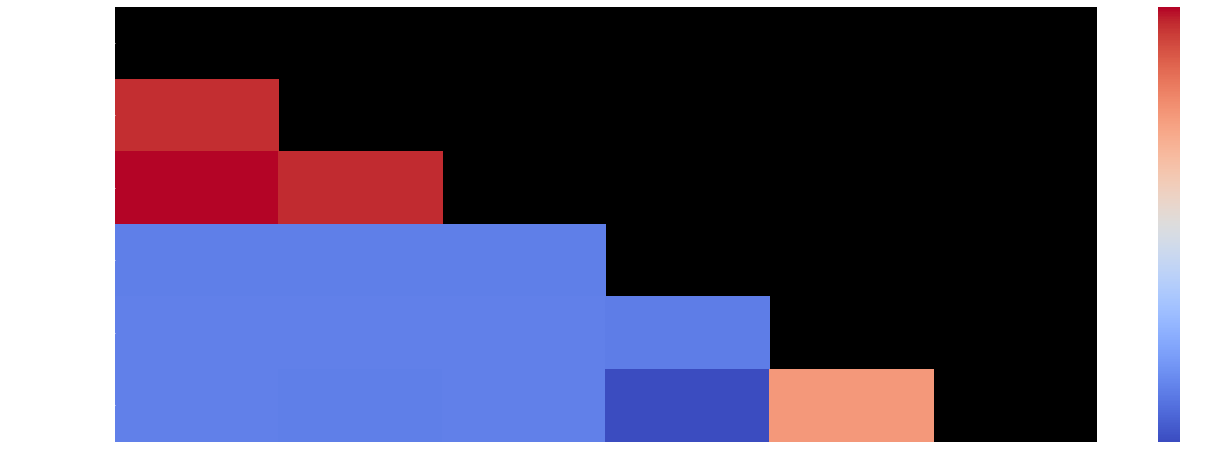

In [ ]:
corrmat = df.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
plt.subplots(figsize = (22, 8))
sns.heatmap(corrmat, mask = mask, cmap = 'coolwarm') # no useful correlation
plt.show()

There is no correlation between variables.

We'll drop the 2 outliers which we detected earlier.

In [ ]:
index_of_outliers = df[df['lylty_card_nbr'] == 226000].index
df = df.drop(index_of_outliers)
print('Outliers Removed!')

Outliers Removed!


## Now lets check out, does we have only chips or some other products too. If we have products other than chips we'll drop them.

In [ ]:
df['prod_name'].nunique()

114

There are 114 different kinds of product in the dataframe.

In [ ]:
df['prod_name'].unique()

1. In one of the product Grain Waves company is written as GrnWves (GrnWves Plus Btroot & Chilli Jam 180g).
2. Natural chip company is written as NCC, Natural Chip Co, Natural ChipCo
3. 'RRD' company is also written as 'Red Rock Deli'
4. Smiths company is written as Smith also.
5. Sunbites whhlegrn is also written as Snbts Whlgrn.
5. Woolworths is also written as WW

In [ ]:
prod_company = ['Burger Rings', 'CCs', 'Cheetos', 'Cheezels', 'Cobs Popd', 'Doritos',
                'French Fries', 'Grain Waves', 'Infuzions', 'Kettle', 'Natural Chip',
                'Pringles', 'RRD', 'Smiths', 'Sunbites Whlegrn', 'Thins', 'Tostitos',
                'Twisties', 'Tyrrells', 'Woolworths']

other_than_chips = ['Doritos Salsa       Medium 300g', 'Doritos Salsa Mild  300g',
                    'Old El Paso Salsa   Dip Chnky Tom Ht300g',
                    'Old El Paso Salsa   Dip Tomato Med 300g',
                    'Old El Paso Salsa   Dip Tomato Mild 300g',
                    'Woolworths Medium   Salsa 300g',
                    'Woolworths Mild     Salsa 300g']

In [ ]:
# code to drop non-chip product samples in dataset df.

print(f'Data shape before dropping: {df.shape}\n')

for a in other_than_chips:
    other_than_chips_index = df[df['prod_name'] == a].index
    df = df.drop(other_than_chips_index)
    print(f'{a}  dropped!!')

print(f'\nData shape after dropping: {df.shape}')
no_unique = df['prod_name'].nunique()
print(f'\nNumber of products in the dataframe: {no_unique}')

Data shape before dropping: (264834, 10)

Doritos Salsa       Medium 300g  dropped!!
Doritos Salsa Mild  300g  dropped!!
Old El Paso Salsa   Dip Chnky Tom Ht300g  dropped!!
Old El Paso Salsa   Dip Tomato Med 300g  dropped!!
Old El Paso Salsa   Dip Tomato Mild 300g  dropped!!
Woolworths Medium   Salsa 300g  dropped!!
Woolworths Mild     Salsa 300g  dropped!!

Data shape after dropping: (249668, 10)

Number of products in the dataframe: 107


We have dropped all the samples which are non-chips transactions in the dataframe.

In [ ]:
sorted(df['prod_name'].unique())

In [ ]:
def find_weight(text):    # func to extract weight of the chips packet sold
    num = re.findall(r'[0-9]+',text)
    return " ".join(num)
df['prod_wt'] = df['prod_name'].apply(lambda x: find_weight(x))
df.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,prod_wt
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170


Added a new column PROD_WT by extracting weight from PROD_NAME.

20


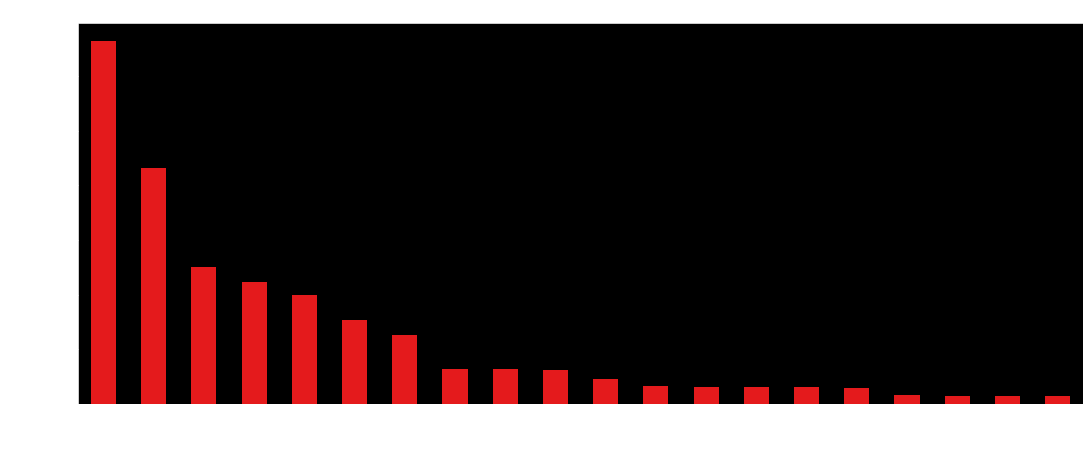

In [ ]:
print(df['prod_wt'].nunique())
df['prod_wt'].value_counts().plot(kind = 'bar')
plt.title('Product Weight Distribution')
plt.xlabel('Product Weight')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

The column PROD_NAME consists of multiple spaces, numbers, Title identation, irregular company names. We'll clean the dataset with the below function.

In [ ]:
def string_cleaning(dataframe): # function to clean the PROD_NAME column and make names consistent
    dataframe['prod_name'] = (dataframe['prod_name'].str.replace(r'[0-9]+[g|G]', '').
                              str.strip().str.replace(r'\s{2,}', ' ').str.lower())
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('dorito ', 'doritos ')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('french fries', 'french_fries')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('grnwves', 'grain_waves')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('grain waves', 'grain_waves')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('infzns', 'infuzions')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('natural chip co', 'natural_chipco')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('natural chip compny', 'natural_chipco')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('natural chipco', 'natural_chipco')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('ncc', 'natural_chipco')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('natural_chipcompny', 'natural_chipco')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('red rock deli', 'red_rock_deli')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('rrd', 'red_rock_deli')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('smith ', 'smiths ')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('snbts', 'sunbites')
    dataframe['prod_name'] = dataframe['prod_name'].str.replace('woolworths', 'ww')

    return dataframe

df = string_cleaning(df)
df.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,prod_wt
0,2018-10-17,1,1000,1,5,natural_chipco seasalt,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,MIDAGE SINGLES/COUPLES,Budget,175
2,2018-11-10,1,1307,346,96,ww original stacked chips,2,3.8,MIDAGE SINGLES/COUPLES,Budget,160
3,2019-03-09,1,1307,347,54,ccs original,1,2.1,MIDAGE SINGLES/COUPLES,Budget,175
4,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,MIDAGE SINGLES/COUPLES,Budget,170


In [ ]:
df['prod_name'].nunique()

107

In [ ]:
sorted(df['prod_name'].unique())

The PROD_NAME column is cleaned now. The first word in every sample is name of the company. So we'll create another column which consists the name of the company.

In [ ]:
def extract_company_name(text):  # function to extract company name
    name = text.split()[0]
    return name

df['prod_comp'] = df['prod_name'].apply(extract_company_name)
df.sample(5)

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,prod_wt,prod_comp
124959,2019-03-01,80,80371,79694,14,smiths crnkle chip orgnl big bag,2,11.8,OLDER SINGLES/COUPLES,Premium,380,smiths
147158,2018-12-23,207,207114,205258,61,smiths crinkle cut chips chicken,2,5.8,RETIREES,Budget,170,smiths
42563,2019-04-23,86,86236,85590,1,smiths crinkle cut chips barbecue,2,5.8,OLDER FAMILIES,Budget,170,smiths
250394,2019-02-21,148,148024,147280,88,kettle honey soy chicken,2,10.8,YOUNG SINGLES/COUPLES,Mainstream,175,kettle
205919,2019-06-09,179,179063,179642,110,ww original corn chips,2,3.8,YOUNG FAMILIES,Mainstream,200,ww


We will also create another column of price of each chips packet, which can be extracted from TOT_SALES and PROD_QTY.

In [ ]:
# new column PROD_PRICE

df['prod_price'] = df['tot_sales']/df['prod_qty']
df['prod_price'] = df['prod_price'].round(2)

Metrics for Data Analysis:


1.   On Which days does the chips are sold in huge quantity?
2.   Is there any particular season where the chips are sold in huge quantity?

1.   Which shops contribute for more sales of chips?
2.   which customer usually buys more chips (Customer to look out for)? 

1.   Which chip is most loved by the customers?
2.   How many packs does the customers often buy? (maybe digout why)

1.   How much money does the shopkeeper make from each customer?
2.   What is the average total sales?

1.   When does total sale seem to increase?
2.   Does the customers buy expensive chips? if yes how much?

1.   What is the driving force for total sales?
2.   Which type of customers seem to buy more?

1.   Does people love to buy larger packs or they are happy with smalller packs?
2.   Does the consumers have some favorite brand that they prefer to buy always?

1.   Does price of the product play a role in selling trends?
2.   Does many different kinds of products from the same brand play a role in purchase behaviour?

















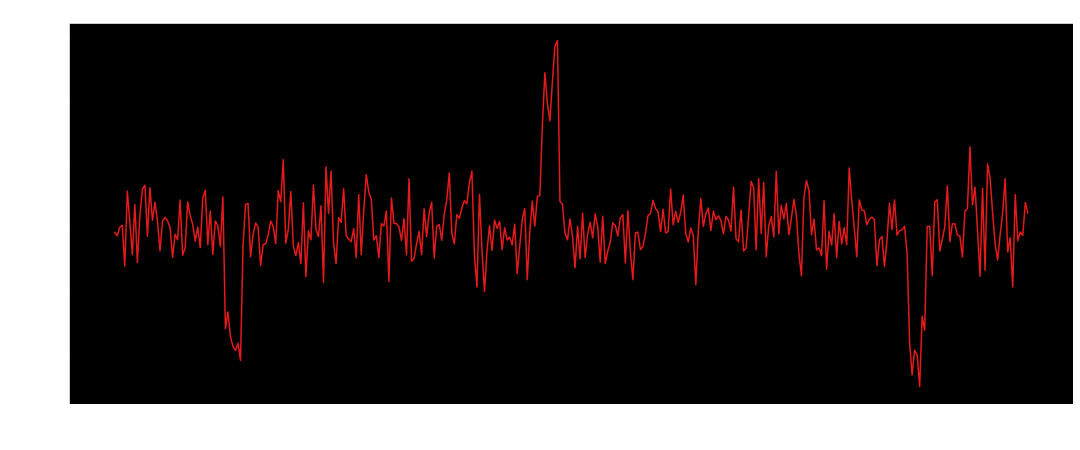

In [ ]:
df.groupby(df['date'])['tot_sales'].sum().plot()
plt.title('Total sales through time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

We can see from the graph that the 'Total Sales' is high during the month of December and low in the month of August and May. The total sales are high during the month of December maybe because it's the month of Christmas! We can say that we can expect huge sales in the month of december.

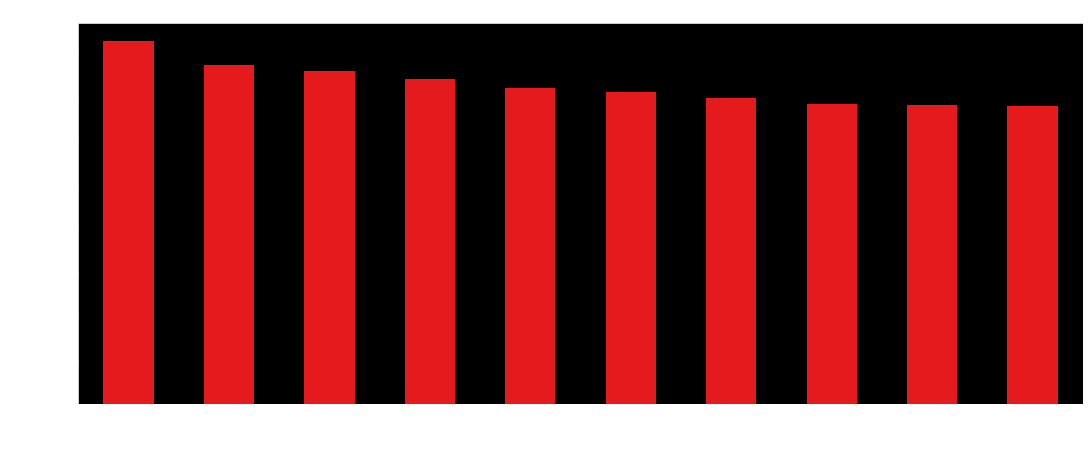

In [ ]:
# shops selling the most of chips

tot_sales_in_each_store = df.groupby('store_nbr')['tot_sales'].sum().sort_values(ascending = False)
tot_sales_in_each_store.head(10).plot(kind = 'bar')
plt.title('Top shops w.r.t Total Sales')
plt.xticks(rotation = 0)
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.show()

Shop no. 226, 88, 165 and 237 are the shops selling the most chips.

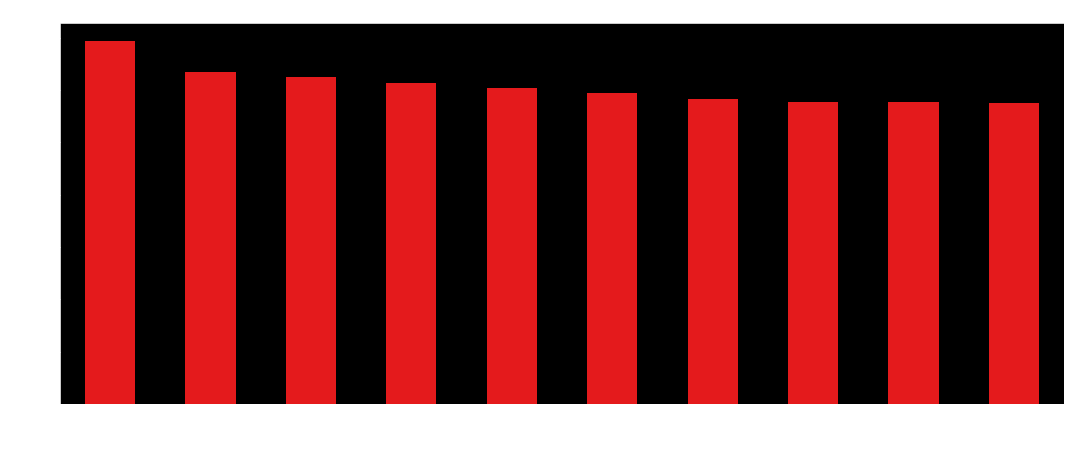

In [ ]:
card_numbers_of_high_purchase_customers = df.groupby(['lylty_card_nbr'])['tot_sales'].sum().sort_values(ascending = False)
card_numbers_of_high_purchase_customers.head(10).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Customers who purchased a lot of chips')
plt.xlabel('Customer Loyality Card Number')
plt.ylabel('Total Sales')
plt.show()

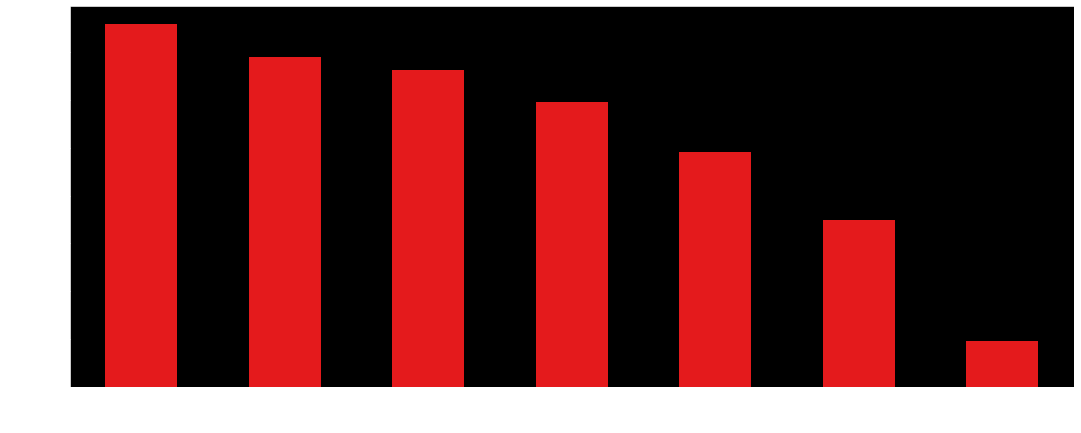

In [ ]:
df.groupby('lifestage')['tot_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

From the plot above it is clear that older consumers are the consumers to look out for. They are driving force for total sales.

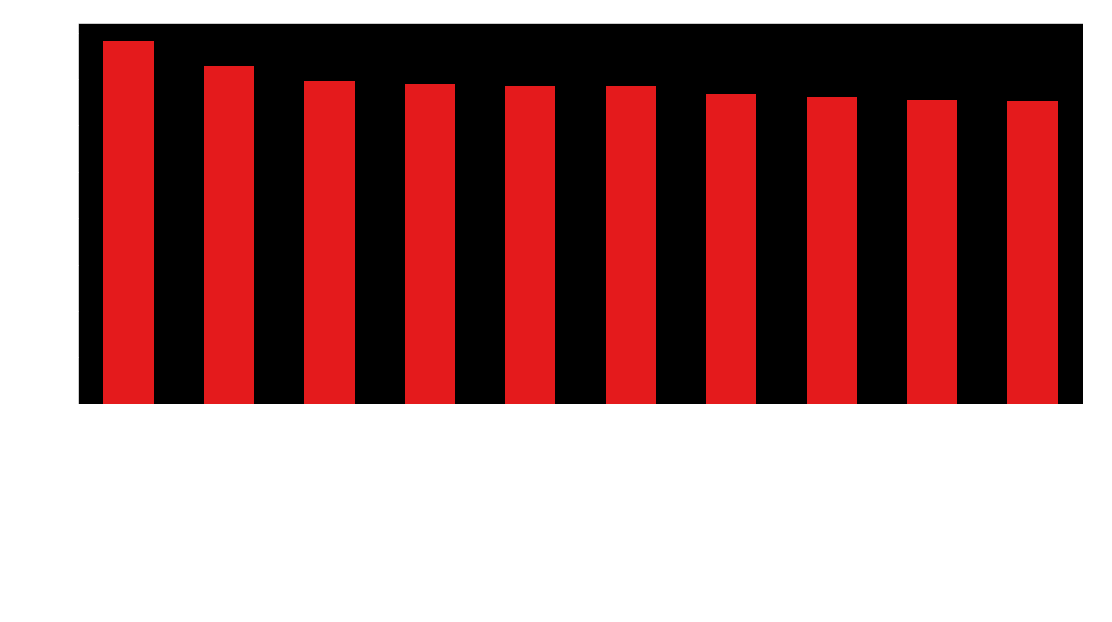

In [ ]:
prod_name_tot_sales = df.groupby('prod_name')['tot_sales'].sum()
prod_name_tot_sales.sort_values(ascending = False, inplace = True )
prod_name_tot_sales.head(10).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.title('Product sold the most')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.show()

Doritos corn chip supreme, Smiths crankle chip original big bag, Smiths crinkle chips salt and vinegar, Kettle mozzarella basil and pesto are the most sold chips in the dataset.

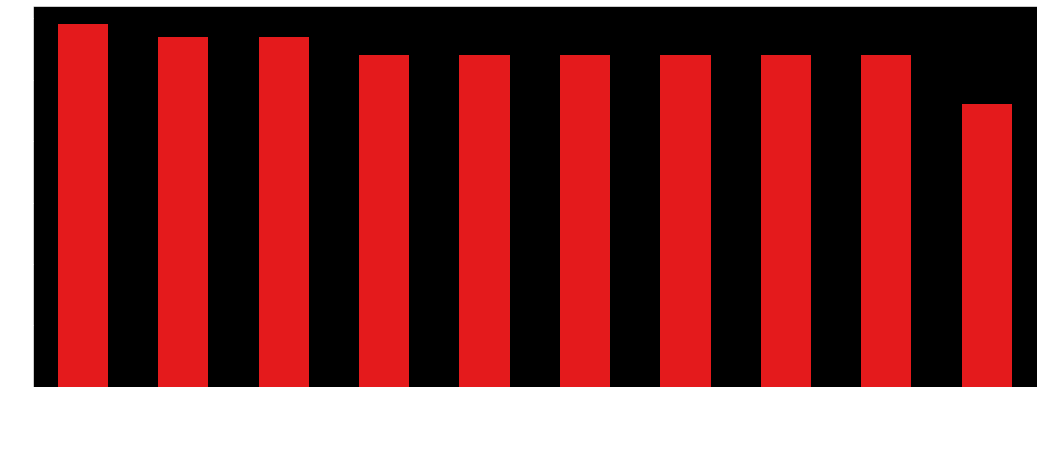

In [ ]:
df.groupby('lylty_card_nbr')['tot_sales'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.show()

In [ ]:
df.groupby('lylty_card_nbr')['tot_sales'].sum().sort_values(ascending = False).describe()

count    71517.000000
mean     25.445480   
std      19.253534   
min      1.700000    
25%      8.800000    
50%      20.600000   
75%      37.900000   
max      138.600000  
Name: tot_sales, dtype: float64

From the above plots and data, we can say that on average each shop earns around 25-27 on average from each customer in a year.

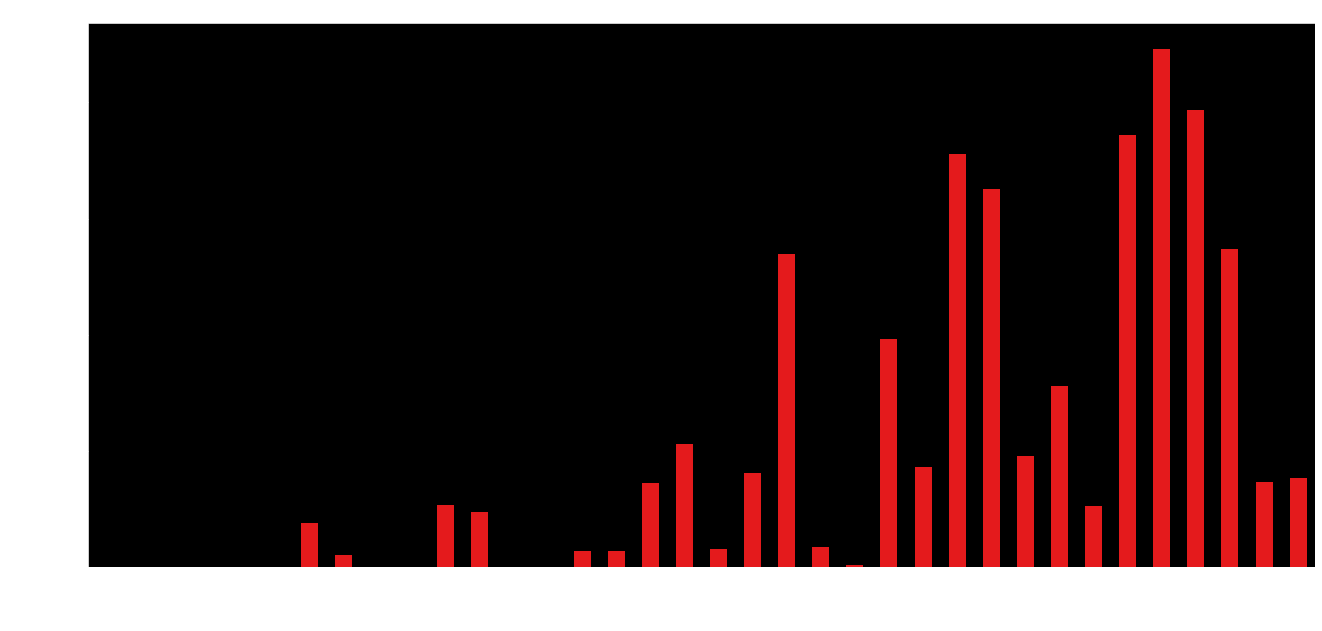

In [ ]:
df.groupby('prod_price')['tot_sales'].sum().plot(kind = 'bar', figsize = (22, 10))
plt.title('Affect of Product Price on Sales')
plt.xlabel('Product Price')
plt.ylabel('Total Sale')
plt.show()

We can see from the plot that the customers are not interested in buying chips which are cheap. People usually prefer chips which are moderate or expensive in the store.

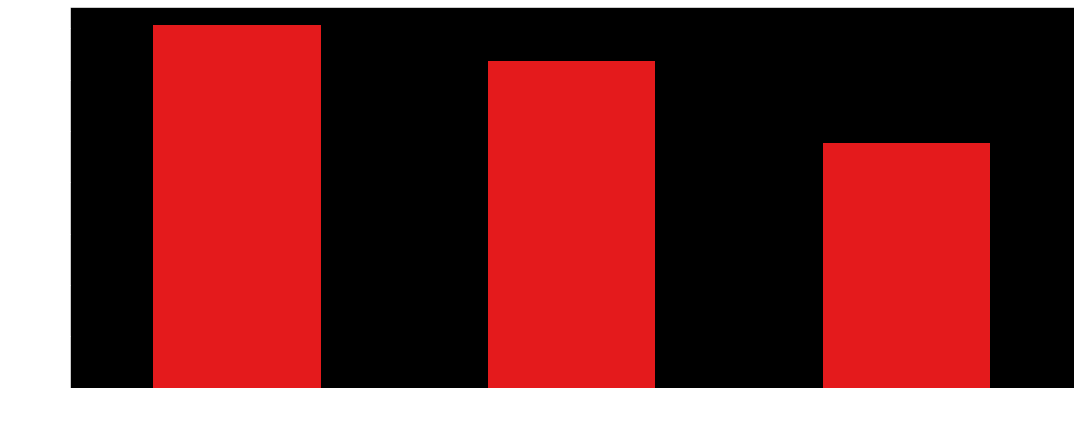

In [ ]:
df.groupby('premium_customer')['tot_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

Mainstream customers tends to buy more than any other customer.

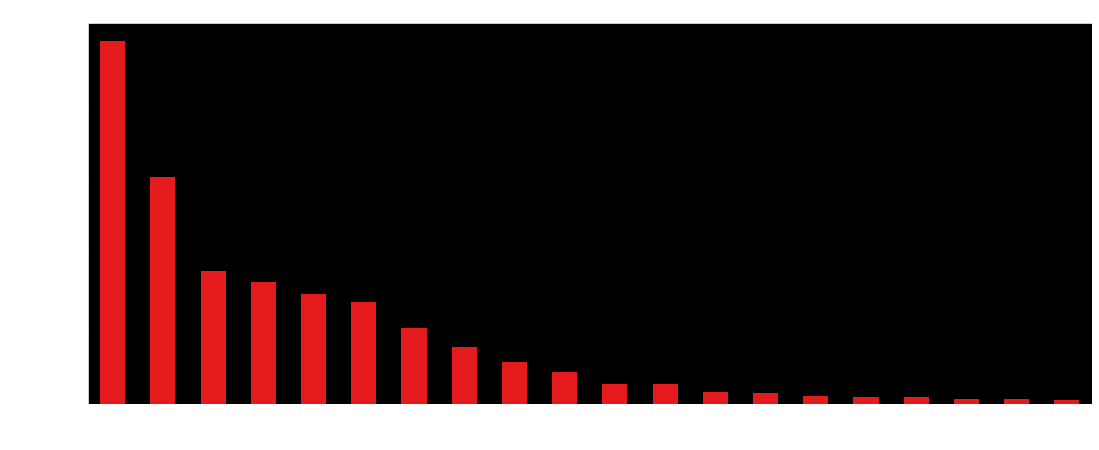

In [ ]:
df.groupby('prod_wt')['tot_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Product Weight influence on sales')
plt.xlabel('Product Weight')
plt.ylabel('Total Sales')
plt.show()

From the above plot we can say that there is no clear trend in product weight. But the consumers tends to buy more in the range of 150-180g.

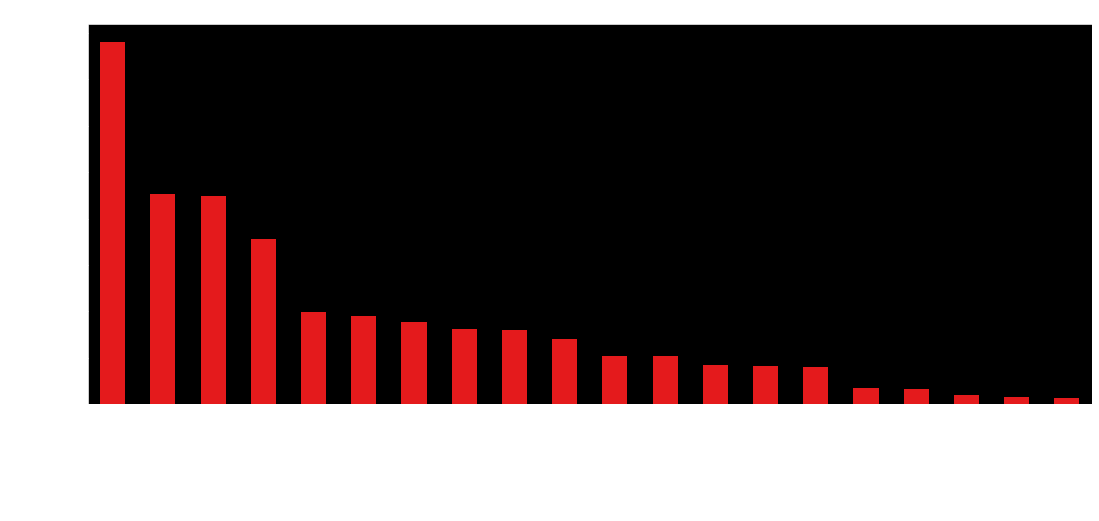

In [ ]:
df.groupby('prod_comp')['tot_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.title('Influence of Company Brand on Total Sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')
plt.show()

Kettle, Doritos and Smiths seem to sell more than any other brands. This can also be because these brands have many flavors of chips in the market.

Let's look at the most selling brand a little deeper and dig out their success mantra!

In [ ]:
kettle_df = df.groupby('prod_comp').get_group('kettle')
kettle_df.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,prod_wt,prod_comp,prod_price
6,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,MIDAGE SINGLES/COUPLES,Budget,150,kettle,4.6
9,2018-08-09,4,4074,2979,60,kettle tortilla chpsfeta&garlic,2,9.2,MIDAGE SINGLES/COUPLES,Budget,150,kettle,4.6
13,2018-07-06,4,4149,3330,46,kettle original,2,10.8,MIDAGE SINGLES/COUPLES,Budget,175,kettle,5.4
19,2019-01-14,4,4196,3538,60,kettle tortilla chpsfeta&garlic,2,9.2,MIDAGE SINGLES/COUPLES,Budget,150,kettle,4.6
31,2019-04-17,7,7150,6904,114,kettle sensations siracha lime,2,9.2,MIDAGE SINGLES/COUPLES,Budget,150,kettle,4.6


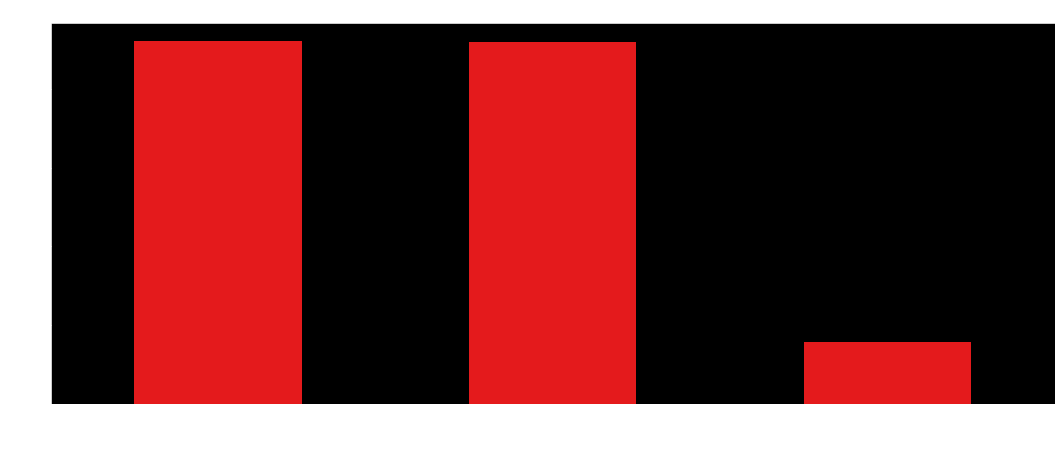

In [ ]:
(kettle_df['prod_wt'].value_counts(normalize = True) * 100).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Product Weight distribution of Kettle chips')
plt.xlabel('Weight in grams')
plt.ylabel('Percentage of prod weight')
plt.show()

From the above figure we can see that in all their products they consist of 150, 175g packs of around 90% in their total products. As we saw early customers likes to buy products whose weight ranges from 150-180g.

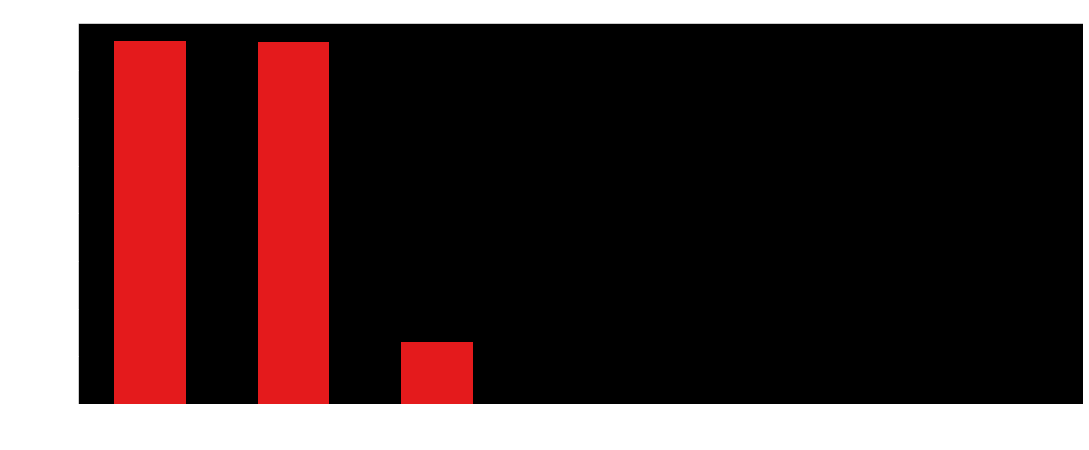

In [ ]:
kettle_df['prod_price'].value_counts().sort_values(ascending = False).plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Product Price distribution of Kettle chips')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Here too the Kettle has spotted the sweet spot, most of their products lie in range of 4.0 to 5.5. Therefore due to these reasons the Kettle chips are most sold.

Therefore we can conclude that:

1.   Total sales is at peak in the month of December. Most of the transactions are done in this month.
2.   Doritos corn chip supreme, Smiths crankle chip original big bag, Smiths crinkle chips salt and vinegar, Kettle mozzarella basil and pesto are the chips driving total sales in the dataset.

1.   We can say that on average each shop earns around 25-27 on average from each customer in a year.
2.   Most of the customers in the dataset doesn't buy chips which are cheap. Therefore the shopkeeper can remove the cheap products in the shop.

1.   The shop must focus on mainstream consumers rather than premium consumers since they just occupy small portion of the sales.
2.   Older consumers are driving force for the shops around 60% of sales are from these consumers. So the shopkeeper must focus on these consumers.

1.   Customers tend to buy chip packets of weight 150-180g
2.   The most loved brand is Kettle, Dortitos, Smiths.

1.   If the shopkeeper wants to sell other products, he must have variety of those brands to make a change in the market.

## Thank You











In [ ]:
cd /content/drive/My Drive/Quantium Internship/Data

/content/drive/My Drive/Quantium Internship/Data


In [ ]:
df.to_csv('df1.csv', index = False)